In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas

In [3]:
fontdict={
    'fontsize':14,
}

In [134]:
with open('hipparcos-bright.txt', 'r') as f:
    lines = f.readlines()

vmags = []
Mags = []
colors = []
pars = []

for line in lines:
    # ignore the comments
    if line.startswith('#'):
        continue
    # split the columns
    line = line.split('|')
    # drop the blank
    for i in range(len(line)):
        line[i] = line[i].strip()
    # remove the entries where the class reads 'UNIDENTIFIED'
    if line[-2]=='UNIDENTIFIED':
        print(line)
        continue
    # convert the parallax to distance
    if line[2]=='':
        continue
    par = np.float(line[2])
    d = 1000/par
    # convert vmag to M
    vmag = np.float(line[4])
    Mag = vmag - 5*np.log10(d/10)
    color = np.float(line[5])
    
    pars.append(par)
    vmags.append(vmag)
    Mags.append(Mag)
    colors.append(color)
pars = np.array(pars)
vmags = np.array(vmags)
Mags = np.array(Mags)
colors = np.array(colors)
# |name      |parallax|spect_type  |vmag |bv_color|ccdm_id   |survey_star|id_chart|hd_id |spect_type_source|class              |

['', 'HIP 52009', '6.18', 'C', '4.89', '2.800', '', 'S', '', '92055', '4', 'UNIDENTIFIED', '']


C:\Users\huqr\AppData\Local\Temp\ipykernel_19380\3733418821.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  par = np.float(line[2])
C:\Users\huqr\AppData\Local\Temp\ipykernel_19380\3733418821.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  vmag = np.float(line[4])
C:\Users\huqr\AppData\Local\Temp\ipykernel_19380\3733418821.py:30

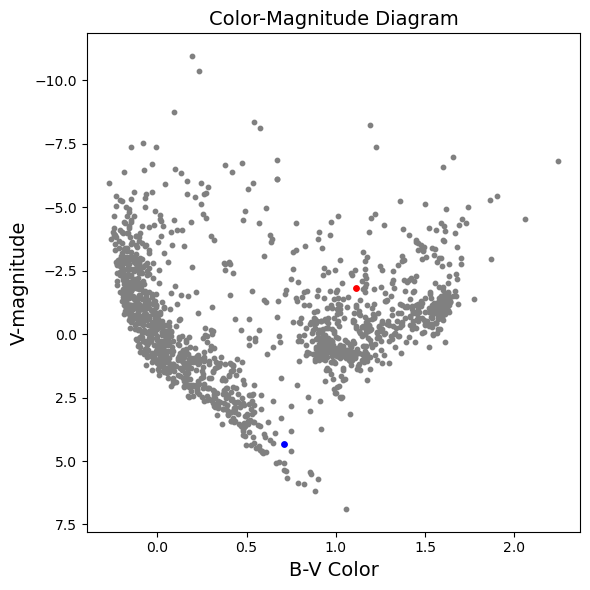

In [144]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(colors, Mags, color='grey', s=10)
ax.scatter(colors[[np.argmax(pars)]], Mags[[np.argmax(pars)]], color='b', s=15)
ax.scatter(colors[[np.argmax(vmags)]], Mags[[np.argmax(vmags)]], color='r', s=15)

ax.invert_yaxis()
ax.set_title('Color-Magnitude Diagram', fontdict=fontdict)
ax.set_ylabel('V-magnitude', fontdict=fontdict)
ax.set_xlabel('B-V Color', fontdict=fontdict)
plt.tight_layout()
plt.savefig('color_mag.png', dpi=200)
plt.show()

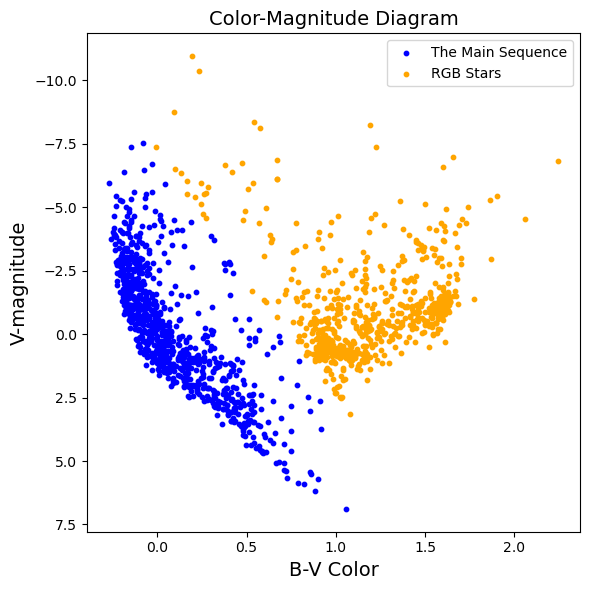

In [143]:
fig, ax = plt.subplots(figsize=(6, 6))

ind = (Mags > -7 + 10*colors)
ax.scatter(colors[ind], Mags[ind], color='b', s=10, label='The Main Sequence')
ax.scatter(colors[~ind], Mags[~ind], color='orange', s=10, label='RGB Stars')
# for i,Mag in enumerate(Mags):
#     if Mag > 7.5 - 2*colors[i]:
#         ax.scatter(colors, Mags, color='b', s=10)
#     else:
#         ax.scatter(colors, Mags, color='y', s=10)
# ax.scatter(colors[[np.argmax(pars)]], Mags[[np.argmax(pars)]], color='b', s=15)
# ax.scatter(colors[[np.argmax(vmags)]], Mags[[np.argmax(vmags)]], color='r', s=15)

ax.invert_yaxis()
ax.set_title('Color-Magnitude Diagram', fontdict=fontdict)
ax.set_ylabel('V-magnitude', fontdict=fontdict)
ax.set_xlabel('B-V Color', fontdict=fontdict)
ax.legend()
plt.tight_layout()
plt.savefig('two_class.png', dpi=200)
plt.show()

4.944767441860466


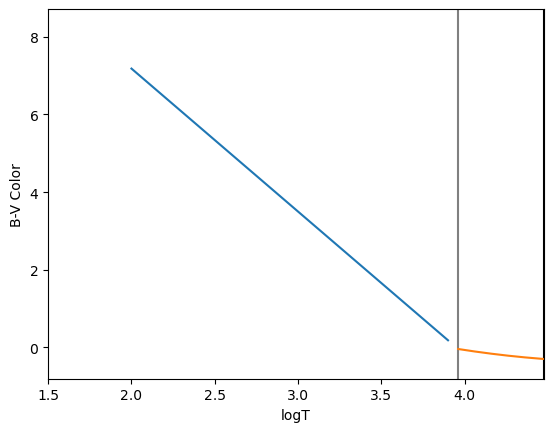

In [127]:
# color =1
a = 0.344
b = -3.402
c = 8.037
x1 = np.arange(2, 3.97, 0.1)
x2 = np.arange(3.961, 10, 0.1)
plt.axvline(-b/(2*a), c='k')
plt.axvline(4.477, c='k')
plt.axvline(3.961, c='grey')
plt.plot(x1, -3.684*x1+14.551)
plt.plot(x2, a*x2**2+b*x2+c)
plt.ylabel('B-V Color')
plt.xlabel('logT')
plt.xlim(1.5, 4.477)
print(-b/(2*a))

In [128]:
color = colors[90]
print(color)
logT = (color - 14.551) / (-3.684)
print(logT)
if logT>3.961:
    a = 0.344
    b = -3.402
    c = 8.037 - color
    delta = b**2 - 4*a*c
    logT = (-b-np.sqrt(delta))/(2*a)
    # sol1 = (-b-np.sqrt(d))/(2*a)
    # sol2 = (-b+np.sqrt(d))/(2*a)
    # print(sol1)
    # print(sol2)
    print(logT)

-0.141
3.988056460369164
4.1216822457052915


In [129]:
# calculate logT from the color
logTs = []
for color in colors:
    # print(color)
    logT = (color - 14.551) / (-3.684)
    # print(logT)
    if logT>3.961:
        a = 0.344
        b = -3.402
        c = 8.037 - color
        delta = b**2 - 4*a*c
        logT = (-b-np.sqrt(delta))/(2*a)
        # sol1 = (-b-np.sqrt(d))/(2*a)
        # sol2 = (-b+np.sqrt(d))/(2*a)
        # print(sol1)
        # print(sol2)
        # print(logT)
    logTs.append(logT)
logTs = np.array(logTs)

In [136]:
np.argmin(Mbols)

485

In [131]:
xs = logTs-4
BCs = -8.449*xs**4 + 13.421*xs**3 - 8.131*xs**2 - 3.901*xs - 0.438
Mbols = Mags + BCs
logLs = (4.75 - Mbols) / 2.5 # in L⊙
# Mbol = 4.75 − 2.5 log (L/L⊙)

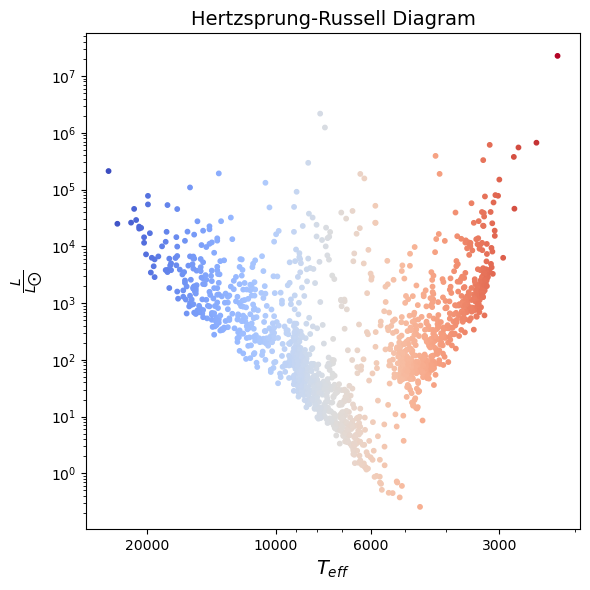

In [147]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(6, 6))

# fig, axes = plt.subplots(figsize=(10, 10))
# fig.subplots_adjust(hspace=0.2, wspace=0.2)
im = ax.scatter(10**logTs, 10**logLs, c=10**logTs, cmap='coolwarm_r', s=10, norm=LogNorm())
# cbar = fig.colorbar(im, ax=ax, orientation='horizontal', ticks=[3e3, 6e3, 1e4, 2e4])

# ax.scatter(10**logTs, Ls, c=10**logTs, cmap='coolwarm', s=10)
# ax.scatter(colors[[np.argmax(pars)]], Mags[[np.argmax(pars)]], color='b', s=15)
# ax.scatter(colors[[np.argmax(vmags)]], Mags[[np.argmax(vmags)]], color='r', s=15)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xticks([3e3, 6e3, 1e4, 2e4])
ax.get_xaxis().set_major_formatter(ScalarFormatter())

ax.invert_xaxis()
# ax.set_ylim(0, 0.1)
# ax.invert_yaxis()
ax.set_title('Hertzsprung-Russell Diagram', fontdict=fontdict)
# ax.set_ylabel('V-magnitude', fontdict=fontdict)
# ax.set_ylabel(r'$\log_{10} \ \frac{L}{L_{\bigodot}}$', fontdict=fontdict)
ax.set_ylabel(r'$\frac{L}{L_{\bigodot}}$', fontdict=fontdict)
# ax.set_xlabel(r'$\log_{10}T_{eff}$', fontdict=fontdict)
ax.set_xlabel(r'$T_{eff}$', fontdict=fontdict)
plt.tight_layout()
plt.savefig('HR_diag.png', dpi=200)
plt.show()

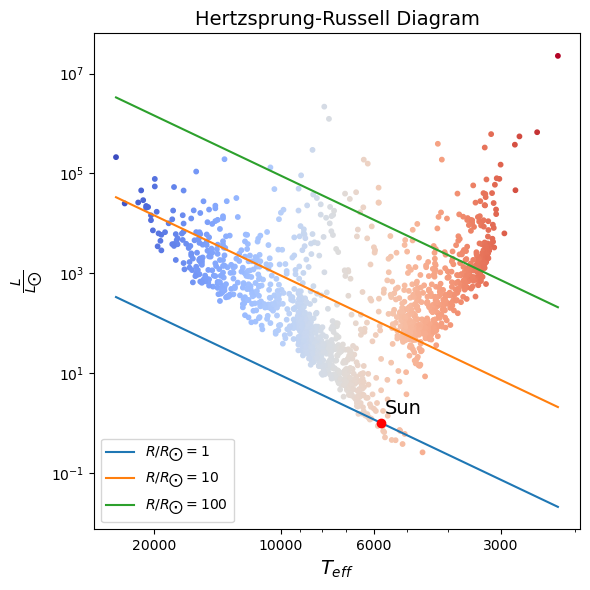

In [190]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(6, 6))

Ts = 5778 #K
Rs = 7e8 #m
sig = 5.67e-8 #W/m2K4
ratios = [1, 10, 100]

T = np.logspace(min(logTs), max(logTs), 10)
for ratio in ratios:
    L = ratio**2 * (T/Ts)**4
    ax.plot(T, L, label=r'$R/R_{\bigodot}=$'+str(ratio))
# fig, axes = plt.subplots(figsize=(10, 10))
# fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax.scatter(10**logTs, 10**logLs, c=10**logTs, cmap='coolwarm_r', s=10, norm=LogNorm())
ax.scatter(Ts, 1, color='r', zorder=3)
ax.text(Ts-1e2, 1.5, 'Sun', fontdict=fontdict)
# cbar = fig.colorbar(im, ax=ax, orientation='horizontal', ticks=[3e3, 6e3, 1e4, 2e4])

# ax.scatter(10**logTs, Ls, c=10**logTs, cmap='coolwarm', s=10)
# ax.scatter(colors[[np.argmax(pars)]], Mags[[np.argmax(pars)]], color='b', s=15)
# ax.scatter(colors[[np.argmax(vmags)]], Mags[[np.argmax(vmags)]], color='r', s=15)

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc=3)

ax.set_xticks([3e3, 6e3, 1e4, 2e4])
ax.get_xaxis().set_major_formatter(ScalarFormatter())

ax.invert_xaxis()
# ax.set_ylim(0, 0.1)
# ax.invert_yaxis()
ax.set_title('Hertzsprung-Russell Diagram', fontdict=fontdict)
# ax.set_ylabel('V-magnitude', fontdict=fontdict)
# ax.set_ylabel(r'$\log_{10} \ \frac{L}{L_{\bigodot}}$', fontdict=fontdict)
ax.set_ylabel(r'$\frac{L}{L_{\bigodot}}$', fontdict=fontdict)
# ax.set_xlabel(r'$\log_{10}T_{eff}$', fontdict=fontdict)
ax.set_xlabel(r'$T_{eff}$', fontdict=fontdict)
plt.tight_layout()
plt.savefig('HR_diag.png', dpi=200)
plt.show()